In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path
path = r'C:\Users\cook family\Desktop\07-2023 Instacart Basket Analysis'

In [3]:
#Importing orders_products_merged_grouping.pkl dataframe
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

# Question 1 Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data 

In [4]:
#Checking Imported Dataframe
df_cust_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
#Checking the size
df_cust_merge.shape

(32404859, 35)

In [6]:
#Checking the column titles
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   eval_set               object  
 3   order_number           int64   
 4   orders_day_of_week     int64   
 5   order_hour_of_day      int64   
 6   days_since_last_order  float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  Unnamed: 0             int64   
 11  product_name           object  
 12  aisle_id               int64   
 13  department_id          int64   
 14  prices                 float64 
 15  _merge                 category
 16  price_range            object  
 17  busiest_day            object  
 18  busiest_days           object  
 19  busiest_period_of_day  object  
 20  max_order              int64   
 21  loyalty_flag           object

# Question 2 f you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

Text(0, 0.5, 'Number of Orders')

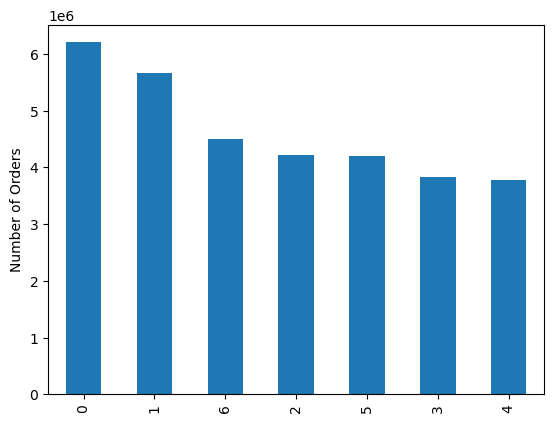

In [54]:
#Bar chart for order_day_of_week column
bar_1 = df_cust_merge['orders_day_of_week'].value_counts().plot.bar()
plt.ylabel("Number of Orders")

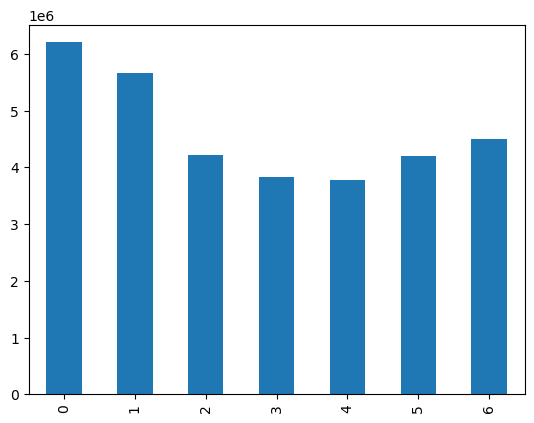

In [53]:



#Bar chart according to their index order
bar_2 = df_cust_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

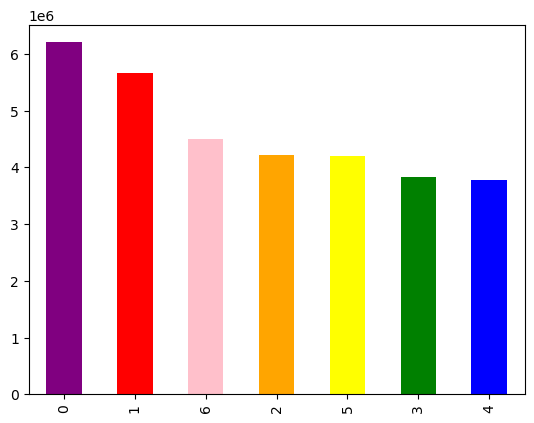

In [9]:
#Changing the colors of the bar chart
bar_3 = df_cust_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

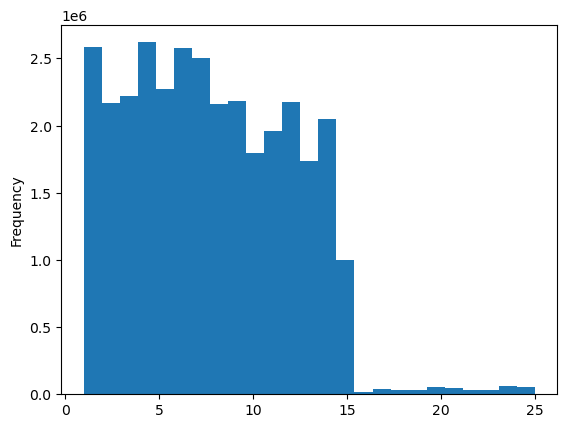

In [10]:
#Histogram for prices column with 25 bins
hist_1 = df_cust_merge['prices'].plot.hist(bins = 25)

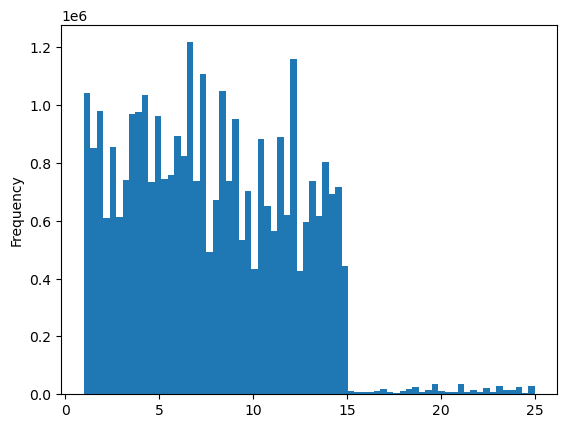

In [11]:
#Histogram for prices column with 70 bins
hist_2 = df_cust_merge['prices'].plot.hist(bins = 70)

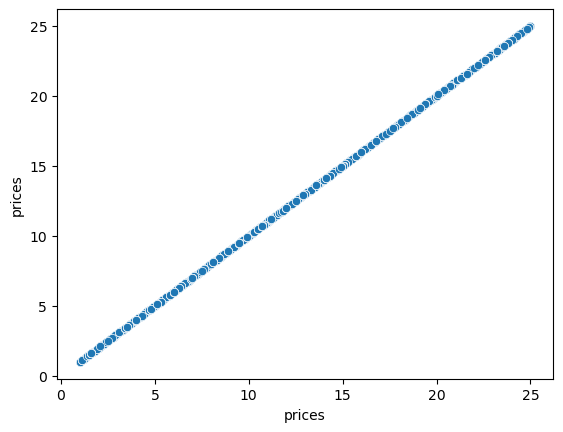

In [12]:
#Scatterplot of the prices column
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df_cust_merge)

In [13]:
#Creating a 70/30 Sampling of the dataframe 
np.random.seed(4)
dev = np.random.rand(len(df_cust_merge)) <= 0.7

In [14]:
#List of randomized True and False values
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
#Testing the size of the array
dev.shape

(32404859,)

In [16]:
#Sample Example of the function
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [17]:
#Store the dataframe into two samples, 70% in the big and 30% in the small
big = df_cust_merge[dev]
small = df_cust_merge[~dev]

In [18]:
#Length of the sum of the two sample spaces
len(big) + len(small)

32404859

In [19]:
#Creating another dataframe to include only order_day_of_week ad prices from the small sample space
df_2 = small[['orders_day_of_week','prices']]

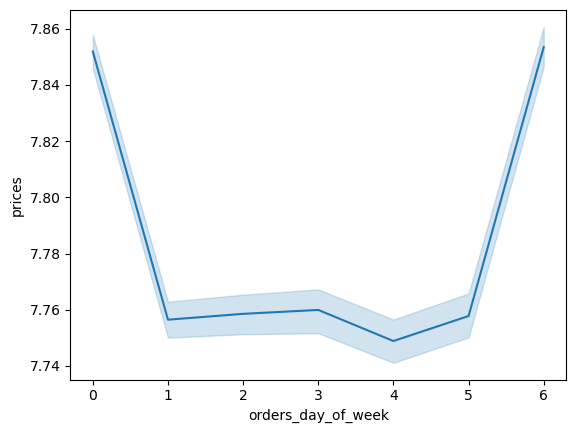

In [20]:
#Creating a line graph using the dataframe made of the small sample space
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')


# Question 3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

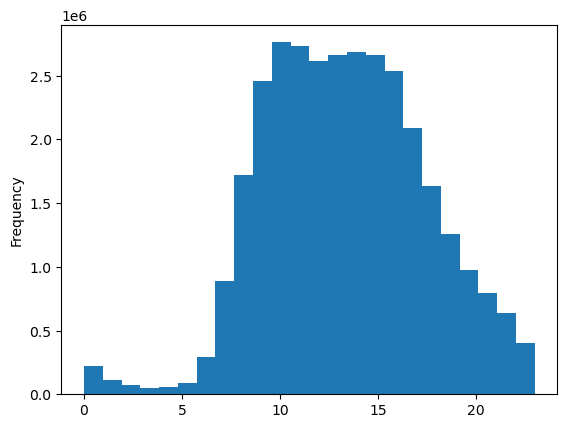

In [21]:
#Histogram for order_hour_of_day column with 24 bins because there are only 24 hours in a day
hist_3 = df_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

This graph shows the peak hours and low hours for instacard users.

# Question 4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

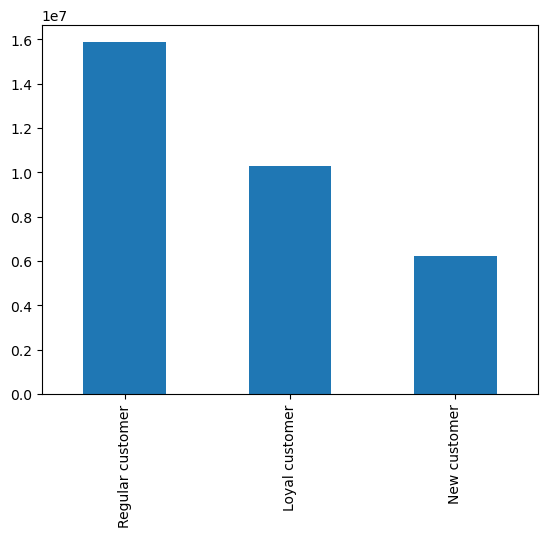

In [22]:
#Bar chart to measure loyalty
bar_4 = df_cust_merge['loyalty_flag'].value_counts().plot.bar()

# Question 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [23]:
#Line Chart to determine if there's a difference in expense between hour of day and prices
df_line = small[['order_hour_of_day', 'prices']]

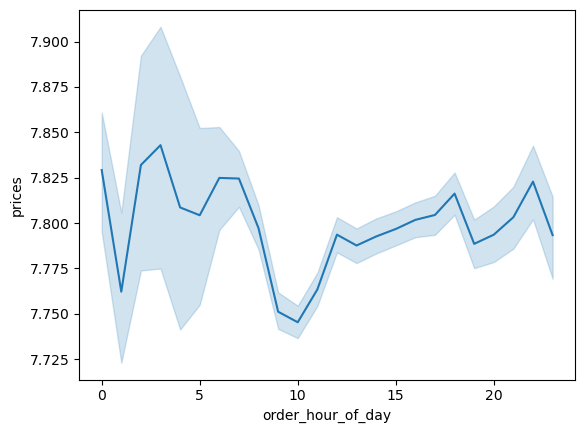

In [24]:
#Creating the line chart
line_2 = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

# Question 6 Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [25]:
#Line Chart to determine if there's a connection between age and number of dependants
df_line_2 = small[['Age', 'n_dependants']]

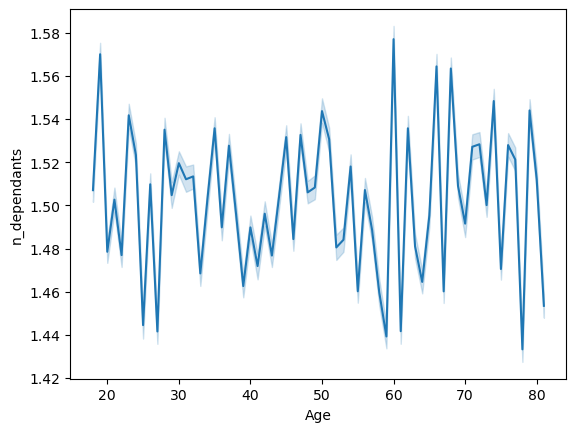

In [26]:
#Creating the line chart
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y = 'n_dependants')

# Question 7 Is there a connection between age and income

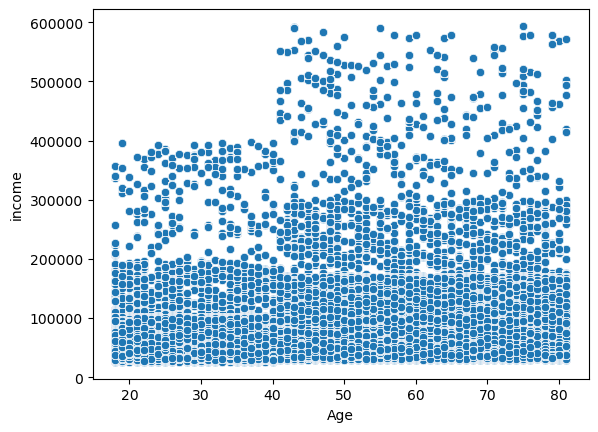

In [47]:
#Scatterplot to determine if there is a connection between age and spending power
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = df_cust_merge)

In the age vs income graph we can see that a larger amount of the population makes 200k and below. It seems that after age 40 we see some peoples income increase. 

# Question 8 Export Visualizations as images

In [28]:
#Export bar chart for order_day_of_week column
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [29]:
#Export bar chart by their index order
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_index.png'))

In [30]:
#Export bar chart for order_day_of_week with colors changed
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_color.png'))

In [31]:
#Export Histogram for prices with 25 bins
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25.png'))

In [32]:
#Export Histogram for prices with 70 bins
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70.png'))

In [33]:
#Export Scatterplot of the prices column
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

In [34]:
#Export line chart of prices vs order_day_of_week
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_dow.png'))

In [35]:
#Export Histogram for order_hour_of_day column 
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

In [36]:
#Export bar chart to measure loyalty frequency
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal.png'))

In [37]:
#Export Line Chart to determine if there's a difference in expense between hour of day and prices
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hod.png'))

In [38]:
#Export Line Chart to determine if there is a connection between age and number of dependants
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

In [39]:
#Export Scatterplot for a connection between age and spending power
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))